In [1]:
import sys
sys.path.insert(1, '../../../')

import numpy as np
import pandas as pd
import math

from util.utils import read_fbin, read_bin, get_total_nvecs_fbin, get_total_dim_fbin, pytorch_cos_sim, ts, entropy
from numpy import linalg
from statistics import median
from scipy.stats import anderson, kstest

from torch import stack as torch_stack

import importlib
import pickle

config_file = 'config_bigann_small'
config = importlib.import_module(config_file)

#Where's the data
INDEX_PATH = config.INDEX_PATH
DATA_TYPE = config.DATA_TYPE
DATA_FILE = config.DATA_FILE
QUERY_FILE = config.QUERY_FILE

#See config.small.py for the config options descriptions
RANDOM_SEED = config.RANDOM_SEED
SAMPLE_SIZE = config.SAMPLE_SIZE
BATCH_SIZE = config.BATCH_SIZE
MAX_ITER = config.MAX_ITER
S = config.S

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

../data/bigann/learn.100M.u8bin sample_size=100000
Total number of dimensions in dataset: 128
Total number of points in dataset: 100000000
Maximum number of points: 100000
KstestResult(statistic=0.10097, pvalue=0.0)
KstestResult(statistic=0.5531900000000001, pvalue=0.0)
KstestResult(statistic=0.01457, pvalue=1.1939914396715106e-09)
--------------------------------
Dimension distribution
    a=0
    b=96
    variance(a,b)=(1072.7676581376,1092.3965025239)
    ks(a,b)=0.00414


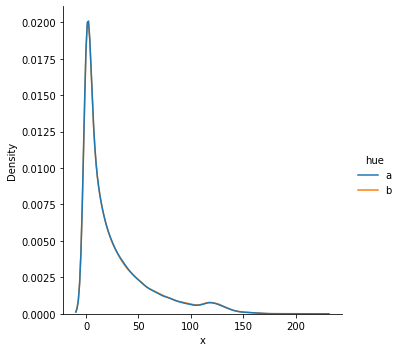

--------------------------------
Dimension distribution
    a=1
    b=103
    variance(a,b)=(851.3582154279,870.4462694975001)
    ks(a,b)=0.0032999999999999


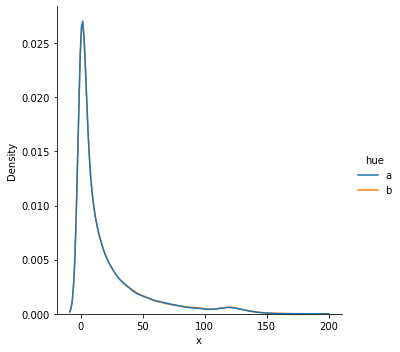

--------------------------------
Dimension distribution
    a=2
    b=102
    variance(a,b)=(864.4668230831,863.9865230550998)
    ks(a,b)=0.0028799999999999


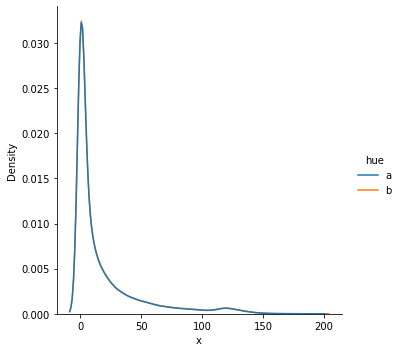

--------------------------------
Dimension distribution
    a=3
    b=101
    variance(a,b)=(837.9447551004,844.8357536910999)
    ks(a,b)=0.00301


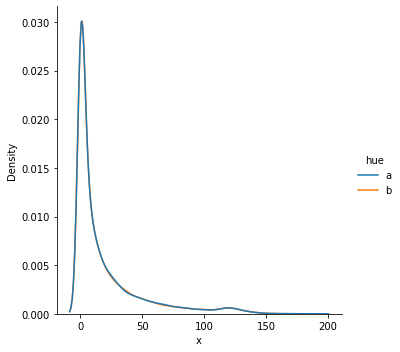

--------------------------------
Dimension distribution
    a=4
    b=100
    variance(a,b)=(1237.9477232496001,1238.6648442991)
    ks(a,b)=0.0027299999999998


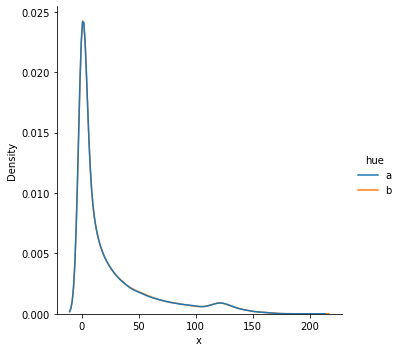

--------------------------------
Dimension distribution
    a=5
    b=99
    variance(a,b)=(549.0134563974999,551.8000919216)
    ks(a,b)=0.00317


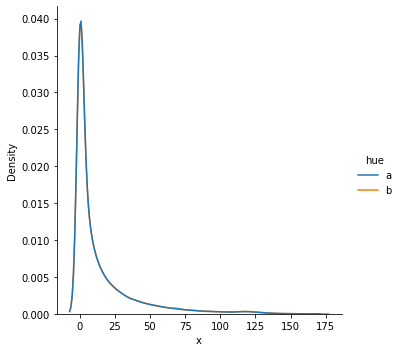

--------------------------------
Dimension distribution
    a=6
    b=98
    variance(a,b)=(536.1490824374999,527.3064460831)
    ks(a,b)=0.00314


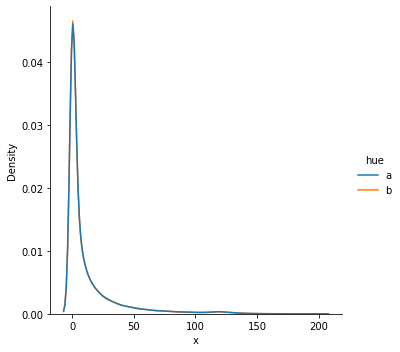

--------------------------------
Dimension distribution
    a=7
    b=97
    variance(a,b)=(572.7895918158999,576.3549217111)
    ks(a,b)=0.00387


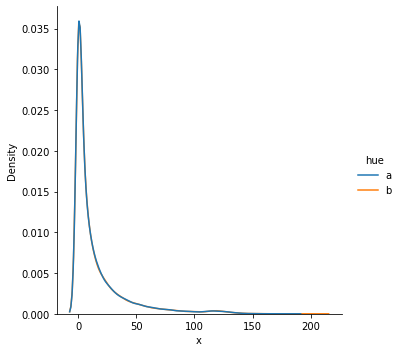

--------------------------------
Dimension distribution
    a=8
    b=104
    variance(a,b)=(2813.9892531456,2808.1790573439002)
    ks(a,b)=0.00598


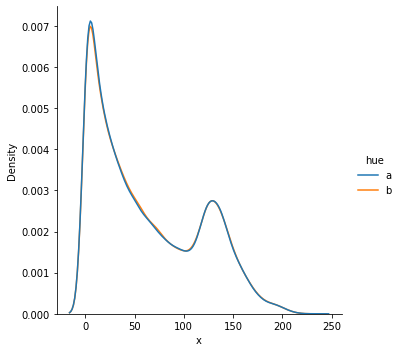

--------------------------------
Dimension distribution
    a=9
    b=111
    variance(a,b)=(1432.4618697310998,1425.1417507904005)
    ks(a,b)=0.0089799999999999


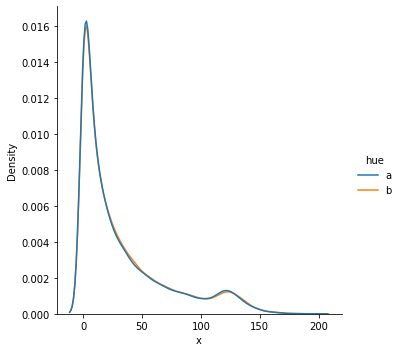

--------------------------------
Dimension distribution
    a=10
    b=110
    variance(a,b)=(879.19396479,863.6869480775)
    ks(a,b)=0.00243


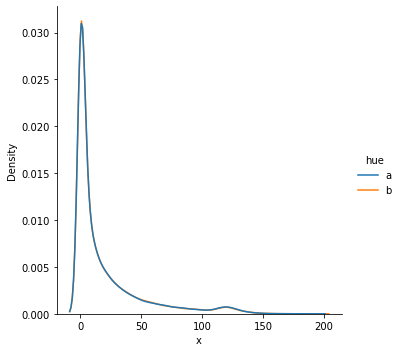

--------------------------------
Dimension distribution
    a=11
    b=109
    variance(a,b)=(753.4121651799003,756.6345132431)
    ks(a,b)=0.00498


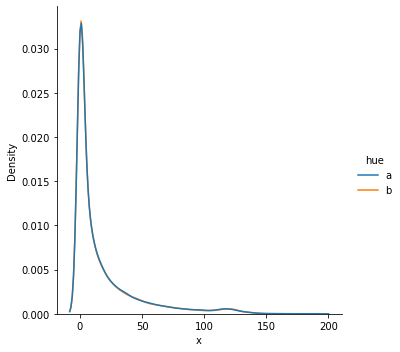

--------------------------------
Dimension distribution
    a=12
    b=108
    variance(a,b)=(1141.2473057116,1151.8482841279001)
    ks(a,b)=0.00192


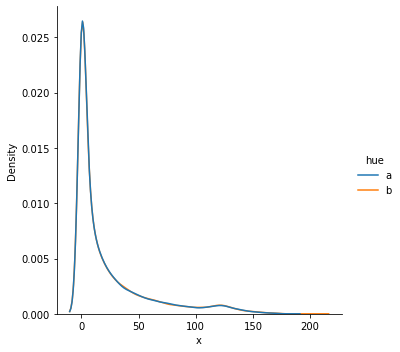

--------------------------------
Dimension distribution
    a=13
    b=107
    variance(a,b)=(588.3122956351001,581.5490536704)
    ks(a,b)=0.00518


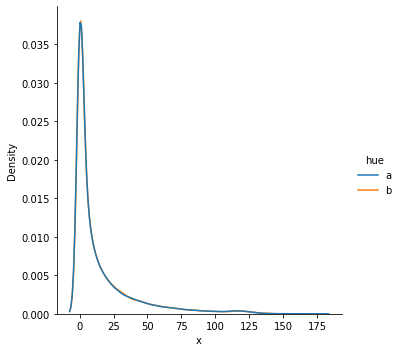

--------------------------------
Dimension distribution
    a=14
    b=106
    variance(a,b)=(690.9568545831,686.7268912156)
    ks(a,b)=0.0034599999999999


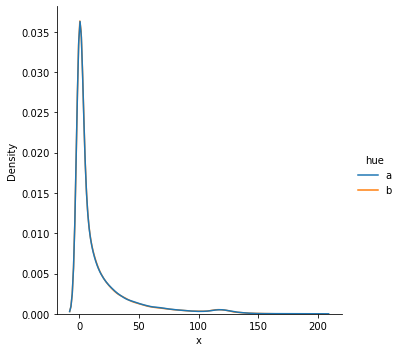

--------------------------------
Dimension distribution
    a=15
    b=105
    variance(a,b)=(1116.4524819990997,1119.2419406524)
    ks(a,b)=0.00673


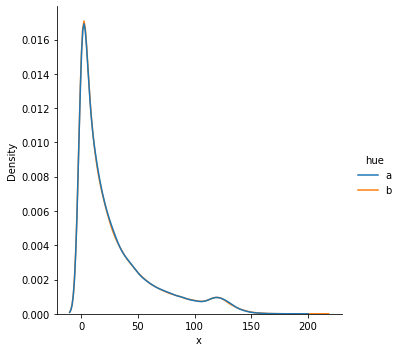

--------------------------------
Dimension distribution
    a=16
    b=112
    variance(a,b)=(2865.163111359999,2876.4142573159)
    ks(a,b)=0.004


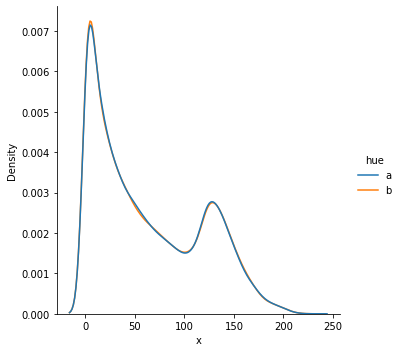

--------------------------------
Dimension distribution
    a=17
    b=119
    variance(a,b)=(1070.3573783998997,1052.8427292039)
    ks(a,b)=0.0047899999999999


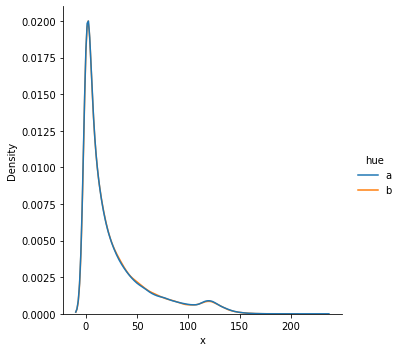

--------------------------------
Dimension distribution
    a=18
    b=118
    variance(a,b)=(663.7508422399,651.3913972336001)
    ks(a,b)=0.0020499999999999


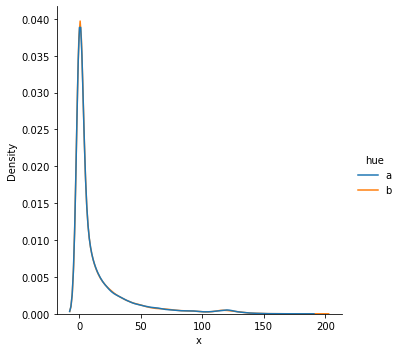

--------------------------------
Dimension distribution
    a=19
    b=117
    variance(a,b)=(606.0252674399001,610.6638532784001)
    ks(a,b)=0.00289


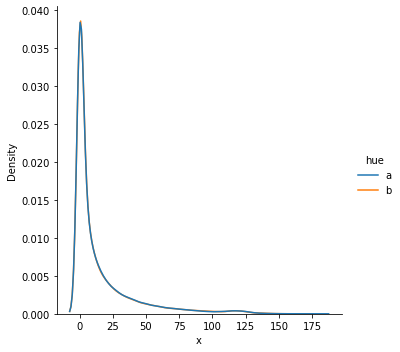

--------------------------------
Dimension distribution
    a=20
    b=116
    variance(a,b)=(1141.5337760631,1161.26632319)
    ks(a,b)=0.0027199999999999


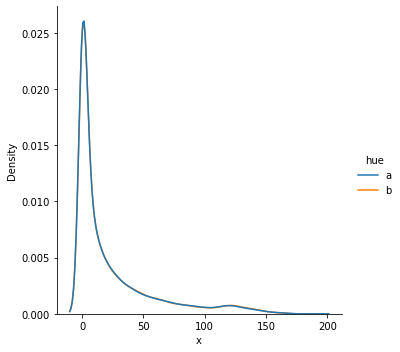

--------------------------------
Dimension distribution
    a=21
    b=115
    variance(a,b)=(760.8958723591002,775.0039743711)
    ks(a,b)=0.00551


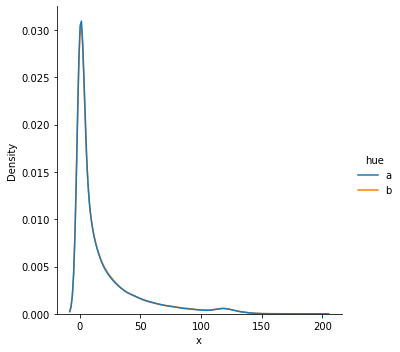

--------------------------------
Dimension distribution
    a=22
    b=114
    variance(a,b)=(996.2743734991,1002.3239890878999)
    ks(a,b)=0.0027599999999999


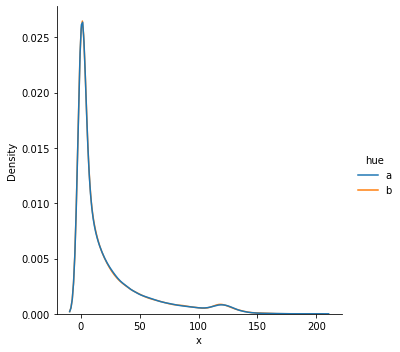

--------------------------------
Dimension distribution
    a=23
    b=113
    variance(a,b)=(1609.6429423343995,1606.2917309424001)
    ks(a,b)=0.0068099999999999


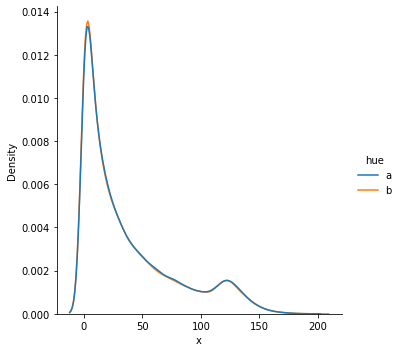

--------------------------------
Dimension distribution
    a=24
    b=120
    variance(a,b)=(1164.5771830679,1150.5057350336)
    ks(a,b)=0.0055899999999999


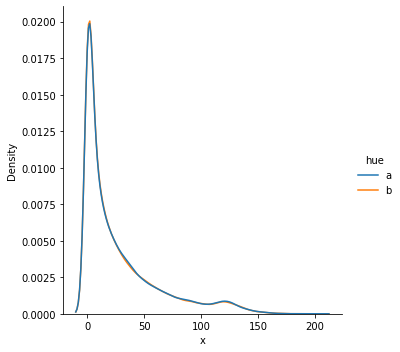

--------------------------------
Dimension distribution
    a=25
    b=127
    variance(a,b)=(622.0122511035999,618.2603911344)
    ks(a,b)=0.0023099999999999


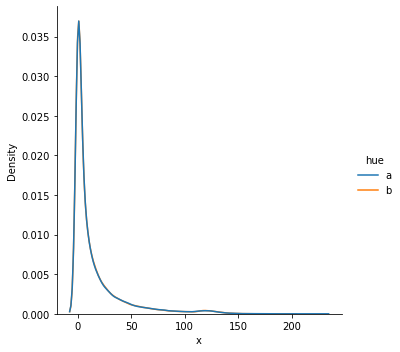

--------------------------------
Dimension distribution
    a=26
    b=126
    variance(a,b)=(526.9354650398999,530.3879470844)
    ks(a,b)=0.0015799999999999


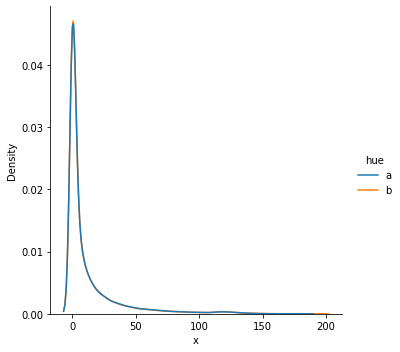

--------------------------------
Dimension distribution
    a=27
    b=125
    variance(a,b)=(563.5879809916001,567.9487510684)
    ks(a,b)=0.00318


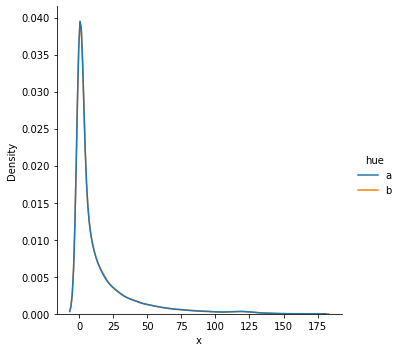

--------------------------------
Dimension distribution
    a=28
    b=124
    variance(a,b)=(1242.6011200636,1247.61819231)
    ks(a,b)=0.0021299999999999


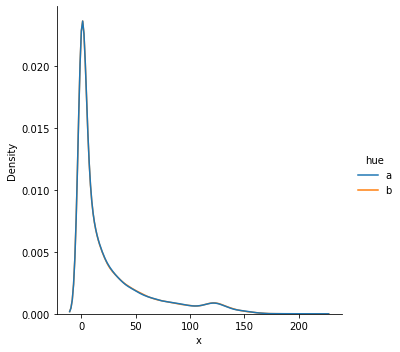

--------------------------------
Dimension distribution
    a=29
    b=123
    variance(a,b)=(895.3272866943998,888.7173580231)
    ks(a,b)=0.0029


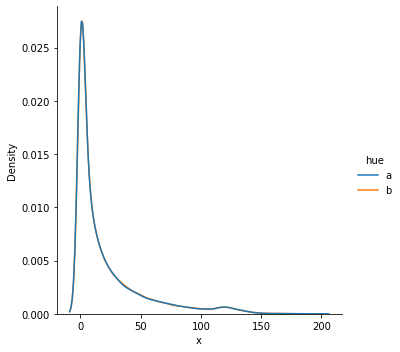

--------------------------------
Dimension distribution
    a=30
    b=122
    variance(a,b)=(1024.4359410364,1041.3235508839)
    ks(a,b)=0.00236


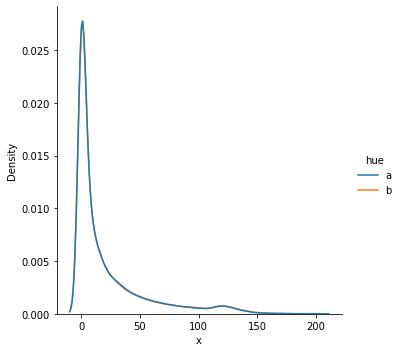

--------------------------------
Dimension distribution
    a=31
    b=121
    variance(a,b)=(1001.3913627900001,995.2066991804)
    ks(a,b)=0.00493


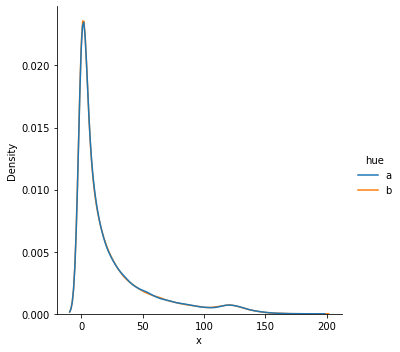

--------------------------------
Dimension distribution
    a=32
    b=64
    variance(a,b)=(1321.6956554095998,1332.1579292318997)
    ks(a,b)=0.0045399999999999


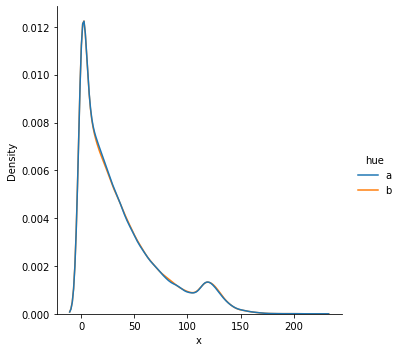

--------------------------------
Dimension distribution
    a=33
    b=71
    variance(a,b)=(787.0896077238999,799.7320817791)
    ks(a,b)=0.00527


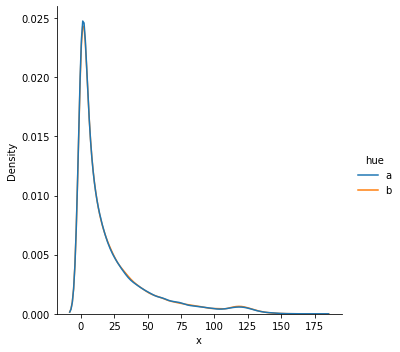

--------------------------------
Dimension distribution
    a=34
    b=70
    variance(a,b)=(923.5551306716,934.03860919)
    ks(a,b)=0.00214


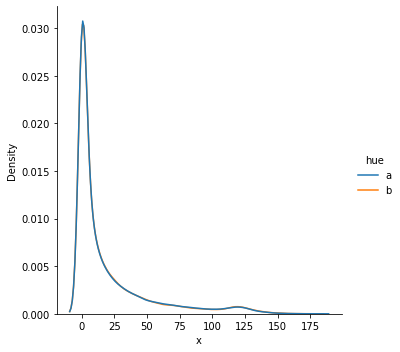

--------------------------------
Dimension distribution
    a=35
    b=69
    variance(a,b)=(1086.4580142599002,1071.7823095679003)
    ks(a,b)=0.0026599999999999


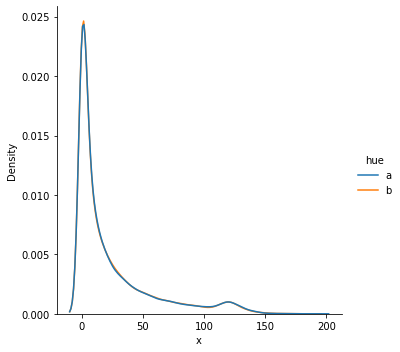

--------------------------------
Dimension distribution
    a=36
    b=68
    variance(a,b)=(1658.8650575003999,1661.0319128670997)
    ks(a,b)=0.00212


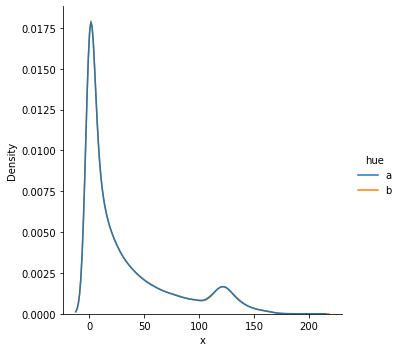

--------------------------------
Dimension distribution
    a=37
    b=67
    variance(a,b)=(871.8210418991001,875.9915804095998)
    ks(a,b)=0.00329


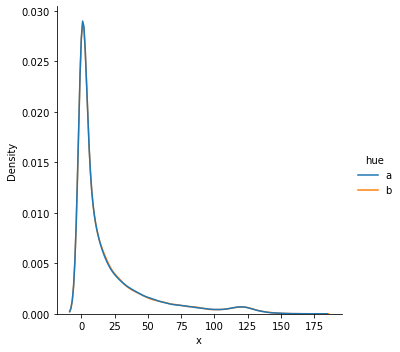

--------------------------------
Dimension distribution
    a=38
    b=66
    variance(a,b)=(584.9306052016,582.9412201230998)
    ks(a,b)=0.00234


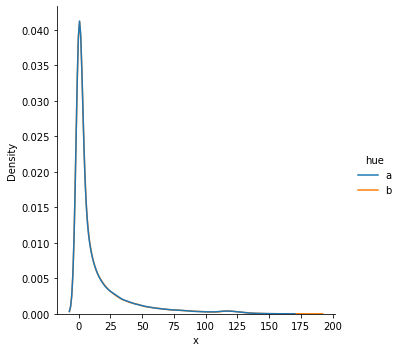

--------------------------------
Dimension distribution
    a=39
    b=65
    variance(a,b)=(655.3665030774998,650.9070866863999)
    ks(a,b)=0.00611


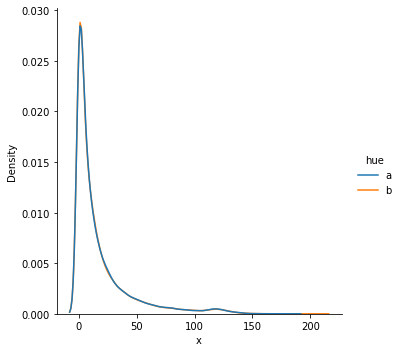

--------------------------------
Dimension distribution
    a=40
    b=72
    variance(a,b)=(2339.3014915559,2334.4481685756)
    ks(a,b)=0.0032899999999999


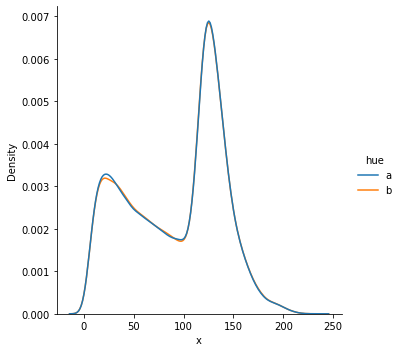

--------------------------------
Dimension distribution
    a=41
    b=79
    variance(a,b)=(965.0032678975,979.9875837774999)
    ks(a,b)=0.0118399999999999


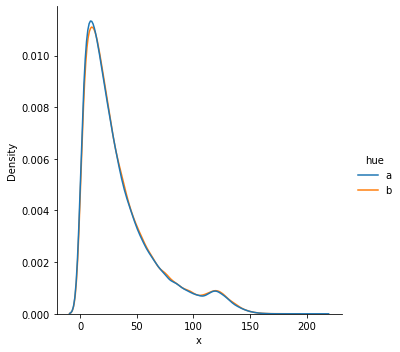

--------------------------------
Dimension distribution
    a=42
    b=78
    variance(a,b)=(1037.2402814031002,1040.889899)
    ks(a,b)=0.0040299999999999


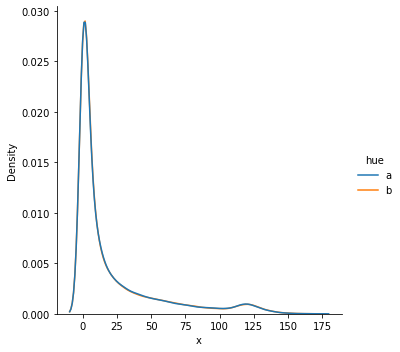

--------------------------------
Dimension distribution
    a=43
    b=77
    variance(a,b)=(1288.6334786398997,1276.9756576599)
    ks(a,b)=0.0045


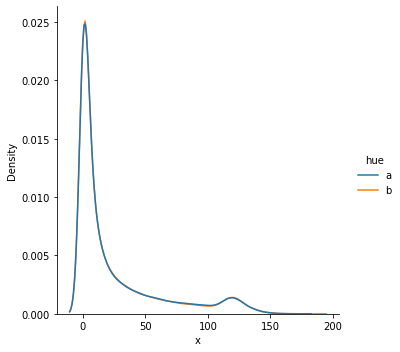

--------------------------------
Dimension distribution
    a=44
    b=76
    variance(a,b)=(1703.5724591791002,1712.6734728623999)
    ks(a,b)=0.00211


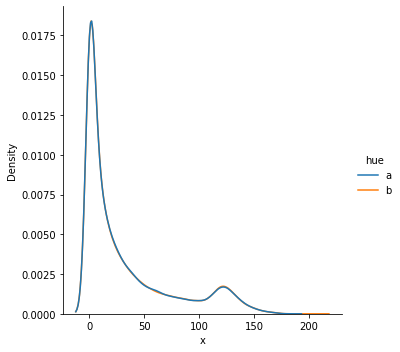

--------------------------------
Dimension distribution
    a=45
    b=75
    variance(a,b)=(784.1415677951001,785.1101170235999)
    ks(a,b)=0.0050399999999999


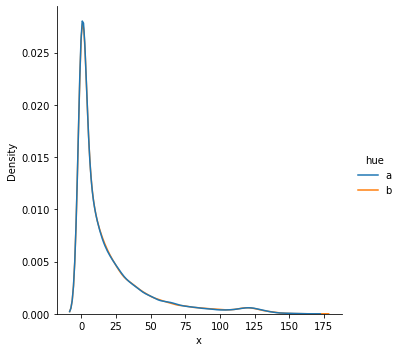

--------------------------------
Dimension distribution
    a=46
    b=74
    variance(a,b)=(622.0554151676,611.6580938684)
    ks(a,b)=0.0037


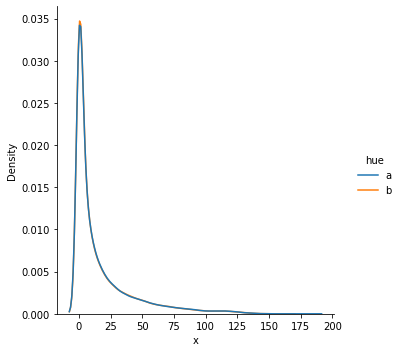

--------------------------------
Dimension distribution
    a=47
    b=73
    variance(a,b)=(1470.4722677500001,1454.8239561583998)
    ks(a,b)=0.01077


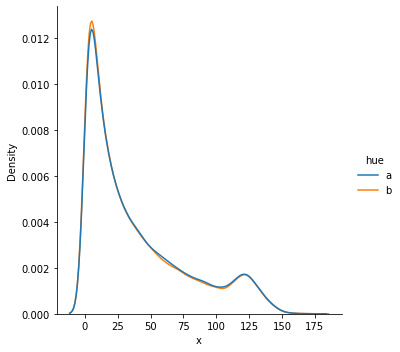

--------------------------------
Dimension distribution
    a=48
    b=80
    variance(a,b)=(2430.3972242231002,2435.4660592576)
    ks(a,b)=0.0023799999999999


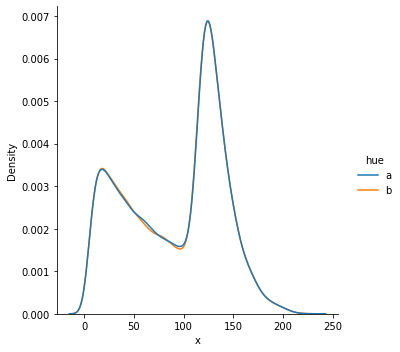

--------------------------------
Dimension distribution
    a=49
    b=87
    variance(a,b)=(1230.4363871911,1246.3121567836)
    ks(a,b)=0.0105999999999999


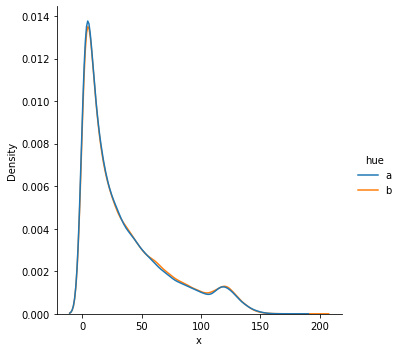

--------------------------------
Dimension distribution
    a=50
    b=86
    variance(a,b)=(553.0126879356,546.8334607679001)
    ks(a,b)=0.0030099999999999


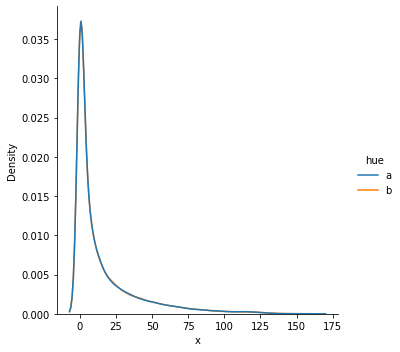

--------------------------------
Dimension distribution
    a=51
    b=85
    variance(a,b)=(814.4636190158999,817.6407513884001)
    ks(a,b)=0.0030799999999999


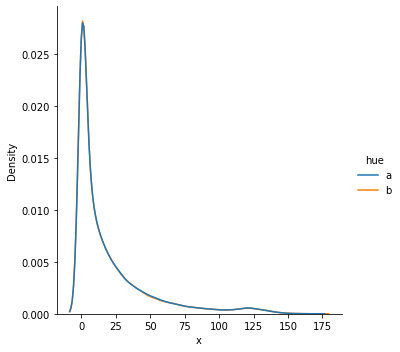

--------------------------------
Dimension distribution
    a=52
    b=84
    variance(a,b)=(1807.4058616796,1824.8715056943997)
    ks(a,b)=0.0040999999999999


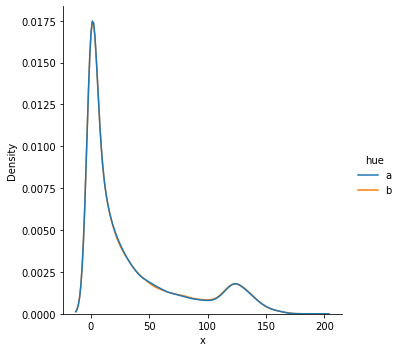

--------------------------------
Dimension distribution
    a=53
    b=83
    variance(a,b)=(1468.4656255675998,1462.1989955136)
    ks(a,b)=0.0040399999999999


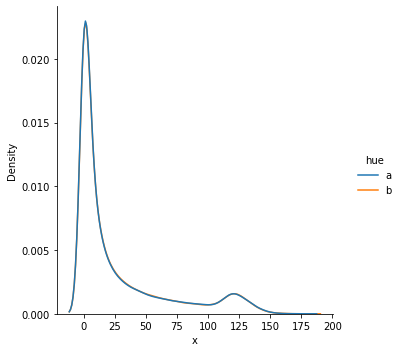

--------------------------------
Dimension distribution
    a=54
    b=82
    variance(a,b)=(1170.2861011164,1155.6855135550998)
    ks(a,b)=0.0037899999999999


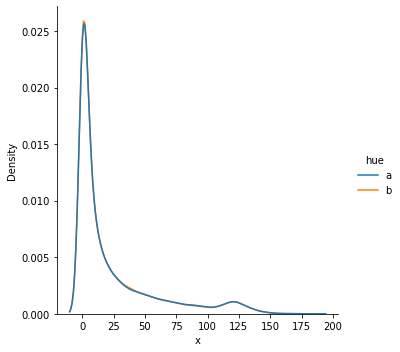

--------------------------------
Dimension distribution
    a=55
    b=81
    variance(a,b)=(1169.9113078639002,1150.7283618999)
    ks(a,b)=0.01399


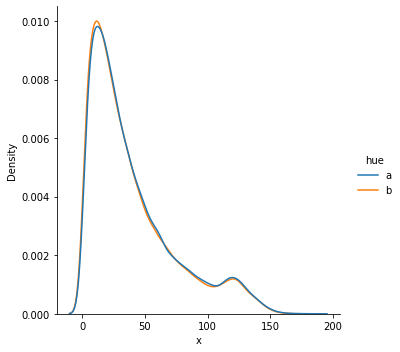

--------------------------------
Dimension distribution
    a=56
    b=88
    variance(a,b)=(1394.0938052775005,1391.2440642224)
    ks(a,b)=0.0046499999999999


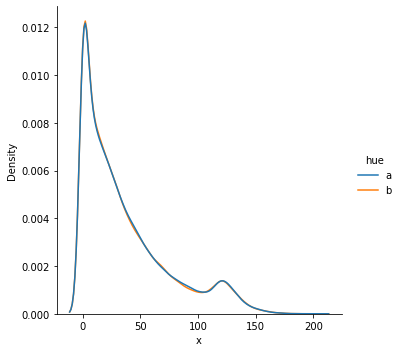

--------------------------------
Dimension distribution
    a=57
    b=95
    variance(a,b)=(707.1904713751001,698.8388897499999)
    ks(a,b)=0.00539


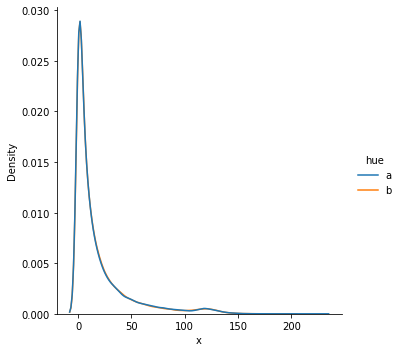

--------------------------------
Dimension distribution
    a=58
    b=94
    variance(a,b)=(640.9758458096,635.0307546235999)
    ks(a,b)=0.00258


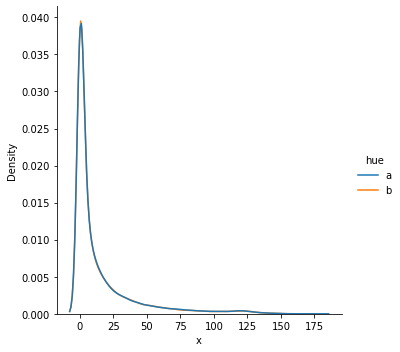

--------------------------------
Dimension distribution
    a=59
    b=93
    variance(a,b)=(938.4688134204,939.8613428735999)
    ks(a,b)=0.0021199999999999


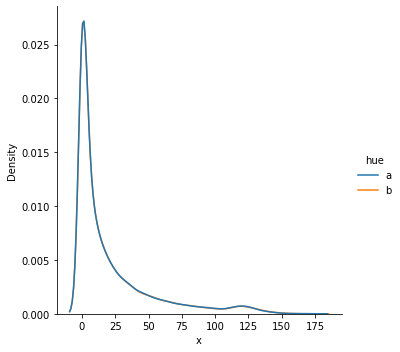

--------------------------------
Dimension distribution
    a=60
    b=92
    variance(a,b)=(1727.3629454591005,1728.8993646400002)
    ks(a,b)=0.0032699999999999


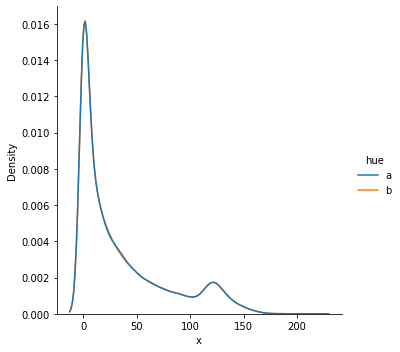

--------------------------------
Dimension distribution
    a=61
    b=91
    variance(a,b)=(1238.9717000518997,1237.1838931904)
    ks(a,b)=0.0034


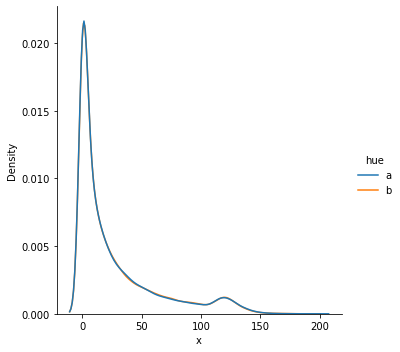

--------------------------------
Dimension distribution
    a=62
    b=90
    variance(a,b)=(1089.3373383196,1075.9701112763998)
    ks(a,b)=0.0042999999999999


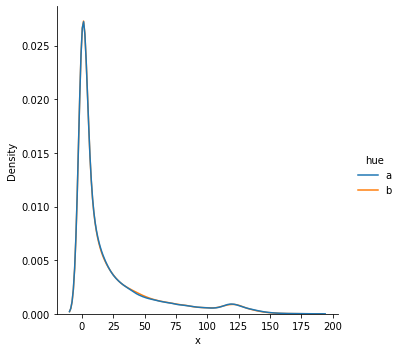

--------------------------------
Dimension distribution
    a=63
    b=89
    variance(a,b)=(926.4199141975002,926.4574710656001)
    ks(a,b)=0.0044399999999999


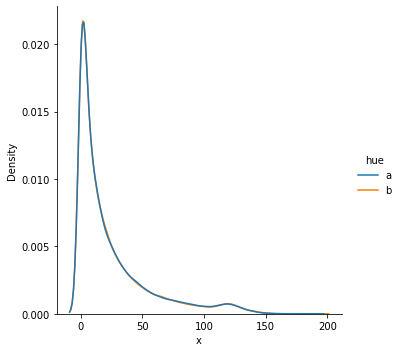

Done! 2021-09-18 18:58:56.020662


In [25]:
"""
This will get the variance and entropy for dimensions of a dataset
"""
def show_distributions(
        path, 
        data_file, 
        dtype,
        sample_size: int = SAMPLE_SIZE
    ):

    #Prepare for batch indexing
    total_num_elements = get_total_nvecs_fbin(data_file)
    total_num_dimensions = get_total_dim_fbin(data_file)
    if sample_size and sample_size<total_num_elements:
        range_upper = sample_size
    else:
        range_upper = total_num_elements

    print(f"{data_file} sample_size={sample_size}")
    print(f"Total number of dimensions in dataset: {total_num_dimensions}")
    print(f"Total number of points in dataset: {total_num_elements}")    
    print(f"Maximum number of points: {range_upper}")

    #just a safety precaution.  These tests can get big!  Remove at your own risk
    assert(sample_size<=100000)
    
    points = read_bin(data_file, dtype, start_idx=0, chunk_size=sample_size)
    sample_variance = np.var(points)

    print(kstest(points[:,0],points[:,1]))
    print(kstest(points[:,0],points[:,40]))
    print(kstest(points[:,40],points[:,80]))
    
    df = pd.read_csv(f'variance_{config_file}.csv')
    
    seen = []
    
    #Load and index the datafile in batches
    for idx,row in df.iterrows():

        dim = row['dimension'].astype(int)
        dim2 = row['ksdimension_0'].astype(int)
        
        if dim not in seen and dim2 not in seen:

            #Scalar values of a specific dimension for all points
            dim_points = points[:,dim]
            dim2_points = points[:,dim2]

            hue = ['a']*sample_size + ['b']*sample_size
            pts = np.concatenate((dim_points,dim2_points))

            paired = pd.DataFrame({
                'x':pts,
                'hue':hue

            })
            print('--------------------------------')
            print(f'Dimension distribution')
            print(f'    a={dim}')
            print(f'    b={dim2}')        
            print(f'    variance(a,b)=({np.var(dim_points)},{np.var(dim2_points)})')
            print(f'    ks(a,b)={row["ksstatistic_0"]}')
            sns.displot(data=paired, x="x", hue="hue", kind="kde")
            plt.show()
            
            seen.append(dim)
            seen.append(dim2)
    

show_distributions(INDEX_PATH,DATA_FILE,DATA_TYPE)
print(f"Done! {ts()}")